### **Step 1: Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Step 2: Load the Titanic Dataset**

In [10]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows of the dataframe
df.head(60)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### **Step 3: Data Cleaning**

In [15]:
# Select numerical variables
numerical_vars = ['age', 'fare', 'pclass', 'sibsp', 'parch']

# Drop rows with missing values in numerical columns
df = df[numerical_vars].dropna()

# Display the first few rows of the cleaned dataframe
df.head()

,age,fare,pclass,sibsp,parch
0,22.0,7.2500,3,1,0
1,38.0,71.2833,1,1,0
2,26.0,7.9250,3,0,0
3,35.0,53.1000,1,1,0
4,35.0,8.0500,3,0,0


### **Step 4: Create a Pairplot**

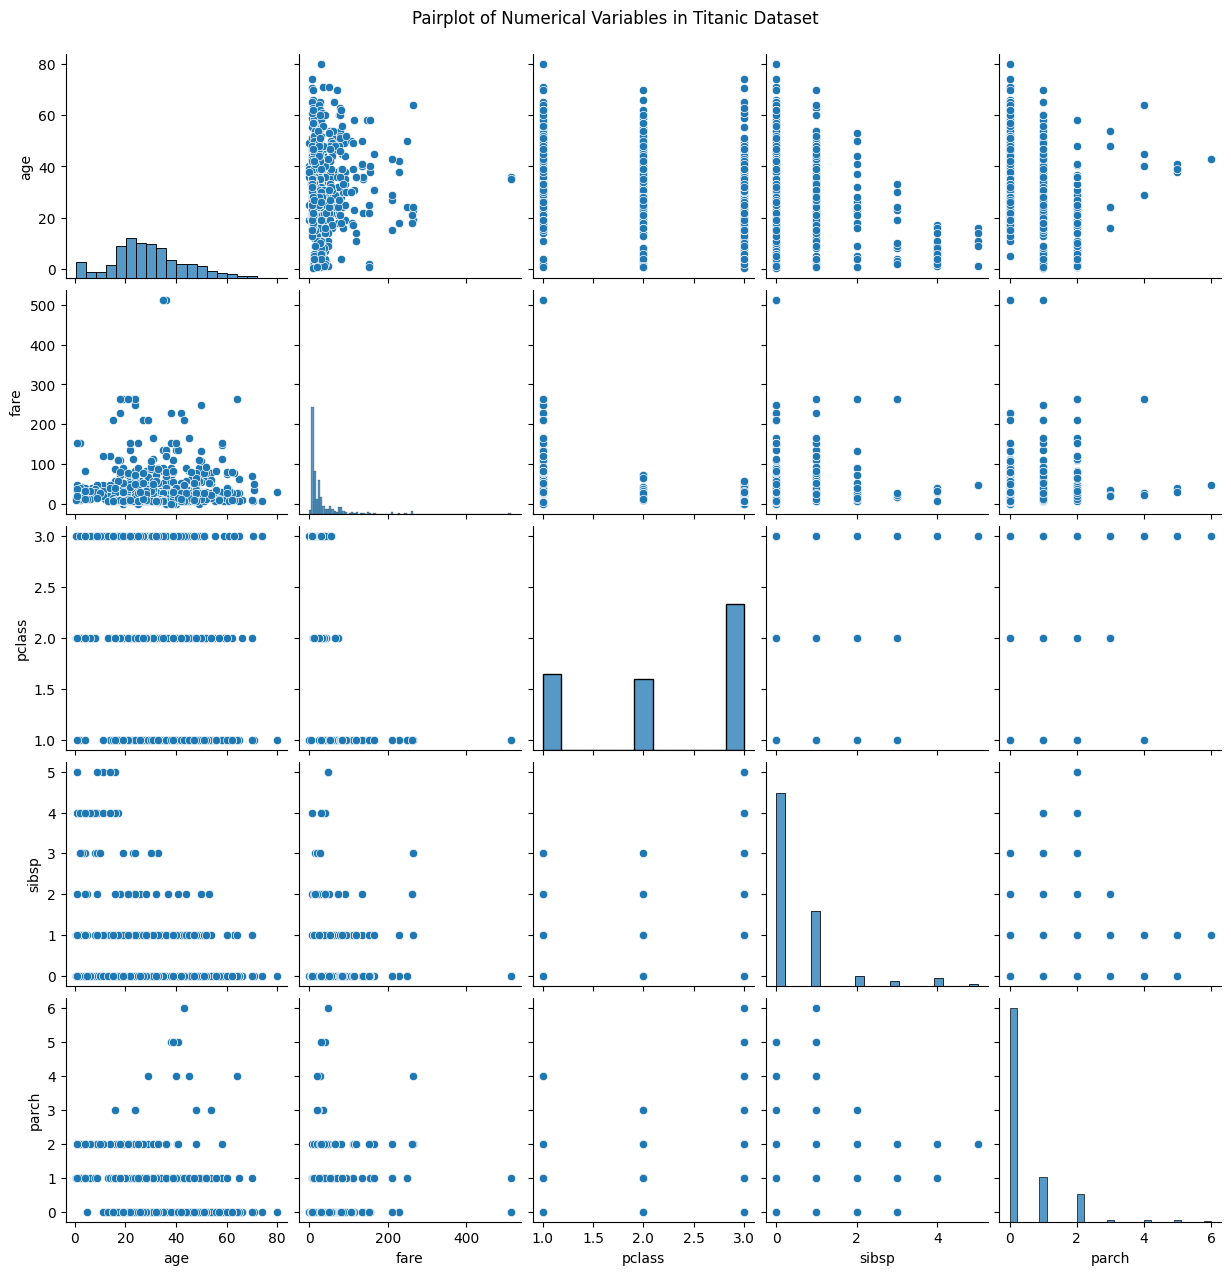

In [16]:
# Create a pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Variables in Titanic Dataset', y=1.02)
plt.show()

### **Step 5: Generate a Heatmap for Correlation Matrix**

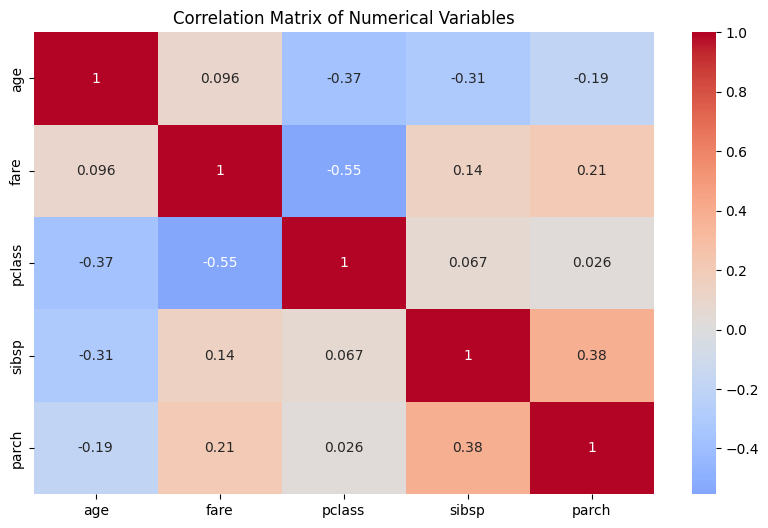

In [17]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### **Step 6: Identify and Print Pairs of Variables with the Highest and Lowest Correlation Coefficients**

In [6]:
# Flatten the correlation matrix and reset index
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]

# Find the highest and lowest correlation pairs
highest_corr_pair = corr_pairs.loc[corr_pairs['Correlation'].idxmax()]
lowest_corr_pair = corr_pairs.loc[corr_pairs['Correlation'].idxmin()]

# Print the pairs
print('Highest Correlation Pair:')
print(f"{highest_corr_pair['Variable1']} and {highest_corr_pair['Variable2']}: {highest_corr_pair['Correlation']}\n")

print('Lowest Correlation Pair:')
print(f"{lowest_corr_pair['Variable1']} and {lowest_corr_pair['Variable2']}: {lowest_corr_pair['Correlation']}")

Highest Correlation Pair:
sibsp and parch: 0.3838198640428336

Lowest Correlation Pair:
fare and pclass: -0.5541824708598451
